# Analysis for 2017-02-18 UTC

In [13]:
%load_ext autoreload
%autoreload 2

from importlib import reload

from imaka.reduce.nights import reduce_2017_02_18 as redu
from imaka.analysis import plot_stats

reload(redu)
reload(plot_stats)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'imaka.analysis.plot_stats' from '/Users/jlu/code/python/imaka/imaka/analysis/plot_stats.py'>

## Date Reduction

Fully reduce the data from 20170118 UTC. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga. 

In [14]:
# Set this to whats appropriate for your machine.
#redu.root_dir = '/Users/fatimaabdurrahman/Desktop/20170218/FLI/'

#redu.make_sky()
#redu.make_flat()

# Reduce open-loop, TTF-loop closed, and closed-loop images.
redu.reduce_pleiades()


REDUCE_FLI: clean_images()
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0031_o.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0038_o.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0045_o.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0052_o.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0059_o.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0066_o.fits

REDUCE_FLI: clean_images()
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0030_ca.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0037_ca.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0044_ca.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0051_ca.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Pleiades/obj0058_ca.fits
  Working on image:  /Users/jlu/data/imaka/20170218/fli/Ple

Find stars and calc stats tables. Again, be sure to load these back up to onaga.

In [21]:
redu.find_stars_pleiades()


REDUCE_FLI: find_stars()
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0031_o_clean.fits
    Calculating background
     Bkg = 1.21 +/- 29.02
     Bkg Threshold = 174.11
     Detecting Stars
     Pass 0 assuming FWHM = 5.0
        Number of sources =  13
        Median x_fwhm = 8.3 +/- 0.5
        Median y_fwhm = 5.0 +/- 0.5
     Pass 1 assuming FWHM = 6.6


/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:433: RuntimeWarning: divide by zero encountered in true_divide
  a = 0.5 * ((cost2 / xstd2) + (sint2 / ystd2))
/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:434: RuntimeWarning: divide by zero encountered in true_divide
  b = 0.5 * ((sin2t / xstd2) - (sin2t / ystd2))
/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:435: RuntimeWarning: divide by zero encountered in true_divide
  c = 0.5 * ((sint2 / xstd2) + (cost2 / ystd2))
/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:436: RuntimeWarning: invalid value encountered in add
  return amplitude * np.exp(-((a * xdiff ** 2) + (b * xdiff * ydiff) +


        Number of sources =  14
        Median x_fwhm = 8.2 +/- 2.0
        Median y_fwhm = 4.9 +/- 1.0
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0038_o_clean.fits
    Calculating background
     Bkg = 1.42 +/- 29.05
     Bkg Threshold = 174.28
     Detecting Stars
     Pass 0 assuming FWHM = 5.0
        Number of sources =  11
        Median x_fwhm = 7.8 +/- 0.6
        Median y_fwhm = 5.8 +/- 0.9
     Pass 1 assuming FWHM = 6.8
        Number of sources =  13
        Median x_fwhm = 7.8 +/- 0.4
        Median y_fwhm = 5.6 +/- 0.3
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0045_o_clean.fits
    Calculating background
     Bkg = 1.42 +/- 29.04
     Bkg Threshold = 174.22
     Detecting Stars
     Pass 0 assuming FWHM = 5.0
        Number of sources =  14
        Median x_fwhm = 7.2 +/- 1.8
        Median y_fwhm = 4.8 +/- 0.9
     Pass 1 assuming FWHM = 6.0
        Number of sources =  14
        Median x_fwhm = 7.1 +/- 1.

/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:434: RuntimeWarning: invalid value encountered in subtract
  b = 0.5 * ((sin2t / xstd2) - (sin2t / ystd2))


        Number of sources =  10
        Median x_fwhm = 8.0 +/- 2.1
        Median y_fwhm = 5.1 +/- 1.5
     Pass 1 assuming FWHM = 6.5
        Number of sources =  9
        Median x_fwhm = 7.9 +/- 2.4
        Median y_fwhm = 5.0 +/- 1.6
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0059_o_clean.fits
    Calculating background
     Bkg = 1.76 +/- 29.03
     Bkg Threshold = 174.18
     Detecting Stars
     Pass 0 assuming FWHM = 5.0
        Number of sources =  16
        Median x_fwhm = 6.1 +/- 1.4
        Median y_fwhm = 4.5 +/- 1.1
     Pass 1 assuming FWHM = 5.3
        Number of sources =  16
        Median x_fwhm = 5.9 +/- 1.4
        Median y_fwhm = 5.9 +/- 1.4
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0066_o_clean.fits
    Calculating background
     Bkg = 0.98 +/- 29.07
     Bkg Threshold = 174.40
     Detecting Stars
     Pass 0 assuming FWHM = 5.0
        Number of sources =  10
        Median x_fwhm = 7.4 +/- 1.0

        Number of sources =  34
        Median x_fwhm = 3.6 +/- 0.9
        Median y_fwhm = 3.2 +/- 0.8
     Pass 1 assuming FWHM = 3.4
        Number of sources =  19
        Median x_fwhm = 3.3 +/- 1.4
        Median y_fwhm = 3.6 +/- 1.3
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0037_ca_clean.fits
    Calculating background
     Bkg = 1.42 +/- 29.05
     Bkg Threshold = 174.27
     Detecting Stars
     Pass 0 assuming FWHM = 5.0
        Number of sources =  33
        Median x_fwhm = 3.2 +/- 1.0
        Median y_fwhm = 3.4 +/- 0.9
     Pass 1 assuming FWHM = 3.3
        Number of sources =  27
        Median x_fwhm = 3.1 +/- 1.5
        Median y_fwhm = 3.4 +/- 2.4
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0044_ca_clean.fits
    Calculating background
     Bkg = 1.61 +/- 29.05
     Bkg Threshold = 174.28
     Detecting Stars
     Pass 0 assuming FWHM = 5.0
        Number of sources =  28
        Median x_fwhm = 3.8 +/- 

/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:433: RuntimeWarning: invalid value encountered in true_divide
  a = 0.5 * ((cost2 / xstd2) + (sint2 / ystd2))
/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:434: RuntimeWarning: invalid value encountered in true_divide
  b = 0.5 * ((sin2t / xstd2) - (sin2t / ystd2))
/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:435: RuntimeWarning: invalid value encountered in true_divide
  c = 0.5 * ((sint2 / xstd2) + (cost2 / ystd2))


        Number of sources =  13
        Median x_fwhm = 3.4 +/- 1.1
        Median y_fwhm = 2.8 +/- 0.8
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0098_cb_clean.fits
    Calculating background
     Bkg = -5.85 +/- 28.86
     Bkg Threshold = 173.16
     Detecting Stars
     Pass 0 assuming FWHM = 5.0
        Number of sources =  17
        Median x_fwhm = 3.6 +/- 0.8
        Median y_fwhm = 2.9 +/- 0.5
     Pass 1 assuming FWHM = 3.3
        Number of sources =  11
        Median x_fwhm = 3.5 +/- 1.2
        Median y_fwhm = 2.8 +/- 0.8
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0105_cb_clean.fits
    Calculating background
     Bkg = -5.44 +/- 28.90
     Bkg Threshold = 173.42
     Detecting Stars
     Pass 0 assuming FWHM = 5.0
        Number of sources =  16
        Median x_fwhm = 3.7 +/- 0.8
        Median y_fwhm = 3.3 +/- 1.9
     Pass 1 assuming FWHM = 3.5
        Number of sources =  19
        Median x_fwhm = 3.1 +/

Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0031_o_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0038_o_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0045_o_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0052_o_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0059_o_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0066_o_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0030_ca_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0037_ca_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0044_ca_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0051_ca_clean.fits
Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/obj0058_ca_clean

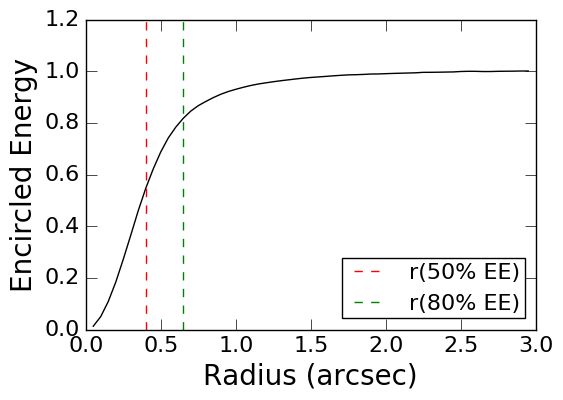

In [20]:
redu.calc_star_stats()

Stack images to make the final "deep" image for open, TTF, and closed-loop data sets. 

In [9]:
redu.stack_pleiades_band()

Attempting match with 14 and 14 stars from starlist1 and starlist2
Begin initial match

  miracle_match_briteN: mirmat50: use brightest 50
  miracle_match_briteN:  
  miracle_match_briteN:  
  miracle_match_briteN: 
  miracle_match_briteN: ORD_BRITE: 
  miracle_match_briteN: 
  miracle_match_briteN: 
  miracle_match_briteN: DO Matching Triangles search...
  miracle_match_briteN: 
  miracle_match_briteN: 
  miracle_match_briteN: found 7 matches 
  miracle_match_briteN: 
7 stars matched between starlist1 and starlist2
End initial match 

Found 0 out of 14 duplicates
14 of 14 stars matched
14 stars used in transform

Found 0 out of 14 duplicates
14 of 14 stars matched
Attempting match with 13 and 14 stars from starlist1 and starlist2
Begin initial match

  miracle_match_briteN: mirmat50: use brightest 50
  miracle_match_briteN:  
  miracle_match_briteN:  
  miracle_match_briteN: 
  miracle_match_briteN: ORD_BRITE: 
  miracle_match_briteN: 
  miracle_match_briteN: 
  miracle_match_briteN: 

/Users/jlu/code/python/imaka/imaka/reduce/reduce_fli.py:719: RuntimeWarning: invalid value encountered in true_divide
  final_image /= final_count


Attempting match with 19 and 19 stars from starlist1 and starlist2
Begin initial match

  miracle_match_briteN: mirmat50: use brightest 50
  miracle_match_briteN:  
  miracle_match_briteN:  
  miracle_match_briteN: 
  miracle_match_briteN: ORD_BRITE: 
  miracle_match_briteN: 
  miracle_match_briteN: 
  miracle_match_briteN: DO Matching Triangles search...
  miracle_match_briteN: 
  miracle_match_briteN: 
  miracle_match_briteN: found 6 matches 
  miracle_match_briteN: 
6 stars matched between starlist1 and starlist2
End initial match 

Found 0 out of 19 duplicates
19 of 19 stars matched
19 stars used in transform

Found 0 out of 19 duplicates
19 of 19 stars matched
Attempting match with 27 and 19 stars from starlist1 and starlist2
Begin initial match

  miracle_match_briteN: mirmat50: use brightest 50
  miracle_match_briteN:  
  miracle_match_briteN:  
  miracle_match_briteN: 
  miracle_match_briteN: ORD_BRITE: 
  miracle_match_briteN: 
  miracle_match_briteN: 
  miracle_match_briteN: 


REDUCE_FLI: find_stars()
  Working on image:  /Users/jlu/data/imaka/20170218/fli/reduce/pleiades/pleiades_stack_open_r.fits
    Calculating background
     Bkg = 1.40 +/- 8.64
     Bkg Threshold = 34.57
     Detecting Stars
     Pass 0 assuming FWHM = 5.0


/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:433: RuntimeWarning: divide by zero encountered in true_divide
  a = 0.5 * ((cost2 / xstd2) + (sint2 / ystd2))
/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:434: RuntimeWarning: divide by zero encountered in true_divide
  b = 0.5 * ((sin2t / xstd2) - (sin2t / ystd2))
/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:435: RuntimeWarning: divide by zero encountered in true_divide
  c = 0.5 * ((sint2 / xstd2) + (cost2 / ystd2))
/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:436: RuntimeWarning: invalid value encountered in add
  return amplitude * np.exp(-((a * xdiff ** 2) + (b * xdiff * ydiff) +
/Users/jlu/code/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/modeling/functional_models.py:43

KeyboardInterrupt: 

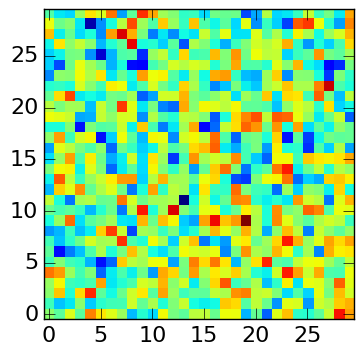

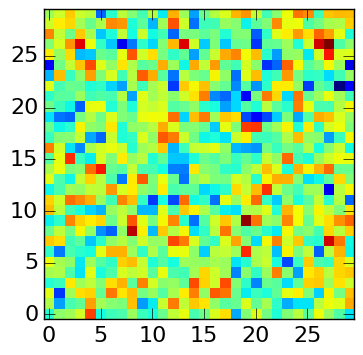

In [16]:
redu.analyze_stacks()

## Fetch stats from onaga to local machine

All the stats files should be kept on onaga. But to sync up with this machine, you can run the following utility. You will probably need to run this in an ipython window rather than from the Jupyter notebook.


In [ ]:
plot_stats.fetch_stats_from_onaga(['20170218'], '/Users/jlu/work/imaka/pleiades/')

## Plot Statistics

Below we will make a suite of standard plots. 

The best plots to look at are:
- Empirical FWHM vs. Time
- Radius of 50% EE vs. Time
- NEA vs. Time

The overall trend is that we are certainly seeing improvements in closed-loop. The TTF-loop isn't behaving as we would want it to.

# Plots:

## FWHMs vs Time
##### Note that emp fwhm plot is repeated at end of notebook, same info
##### Here, NEA FWHM is a full width half max derived from the NEA; the plots at the end of the notebook have the NEA itself
##### Gaussian FWHM here is shown with x and y to show elongation, not in plots at end

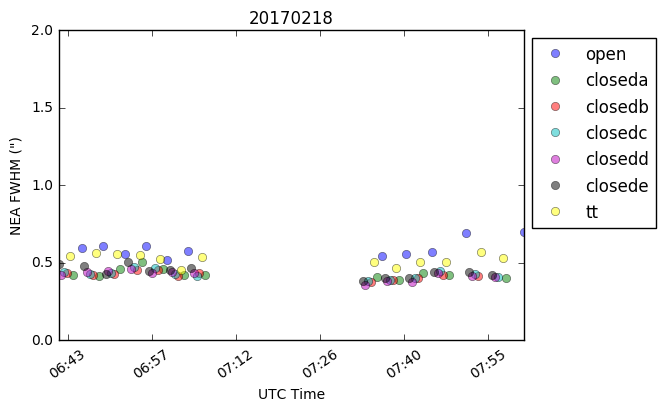

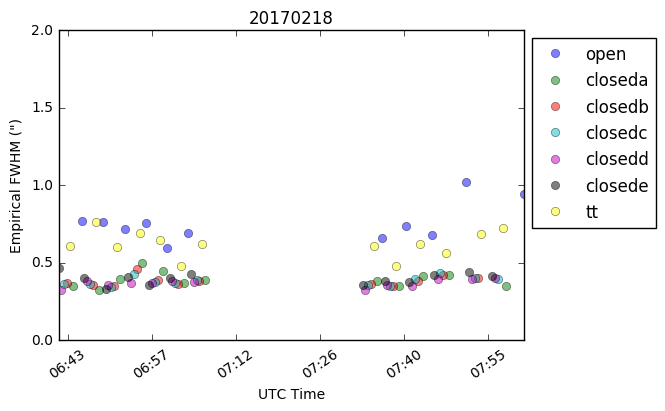

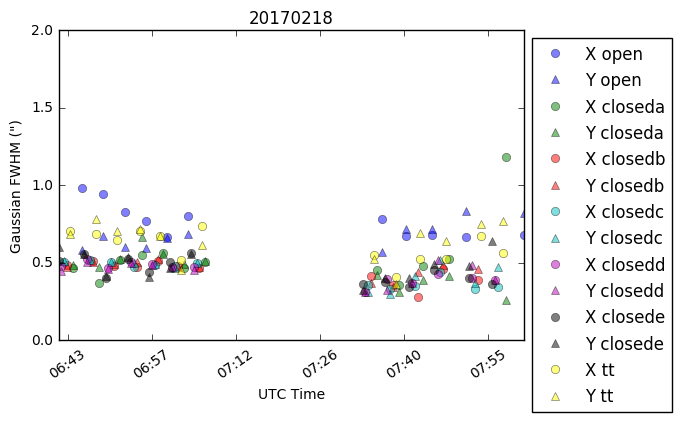

In [5]:
import plot_stats
%matplotlib inline

suffixes = ['open', 'closeda', 'closedb', 'closedc', 'closedd', 'closede', 'tt']
root_dir = '/Users/fatimaabdurrahman/Desktop/'
plot_stats.plot_best_stats('20170218', suffixes, out_suffix='', root_dir=root_dir)

In [10]:
import massdimm
import plot_stats

massdimm.fetch_data('20170218', '/Users/fatimaabdurrahman/Desktop/20170218/mkcw/')

Saving MASS/DIMM data to directory:
/Users/fatimaabdurrahman/Desktop/20170218/mkcw/


In [12]:
mass_dimm_dir = '/Users/fatimaabdurrahman/Desktop/20170218/mkcw/'
stats_root = '/Users/fatimaabdurrahman/Desktop/20170218/'

stats_file = stats_root + 'FLI/reduce/stats/stats_open.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'FLI/reduce/stats/stats_closeda.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'FLI/reduce/stats/stats_closedb.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'FLI/reduce/stats/stats_closedc.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'FLI/reduce/stats/stats_closedd.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'FLI/reduce/stats/stats_closede.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

stats_file = stats_root + 'FLI/reduce/stats/stats_tt.fits'
massdimm.append_mass_dimm(stats_file, mass_dimm_dir)

# Plots with Seeing Information
#### MASS/DIMM plots

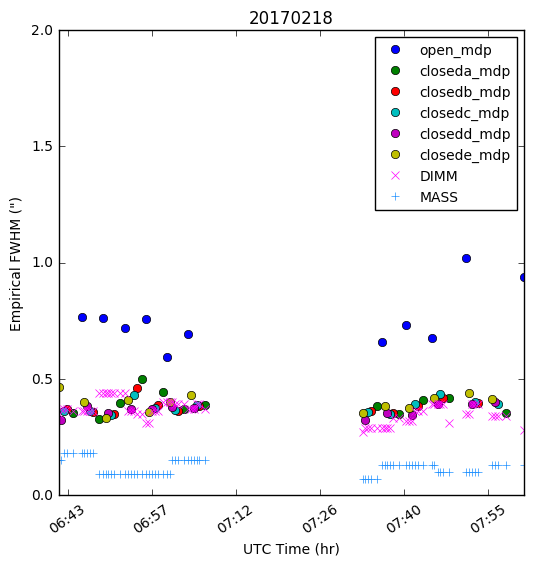

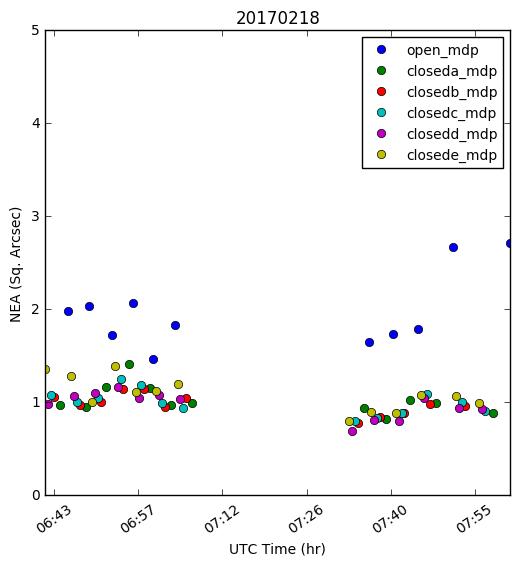

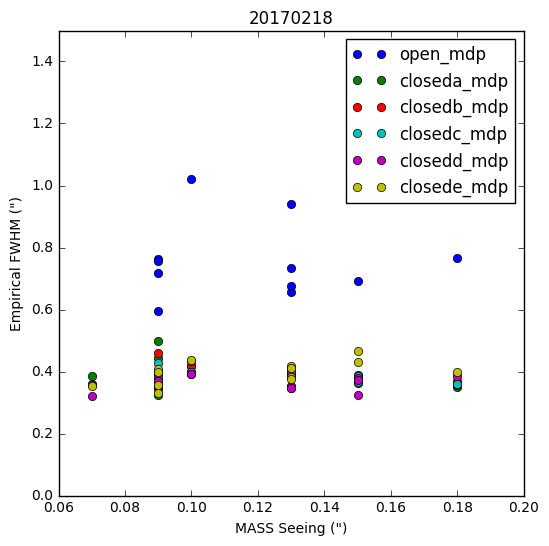

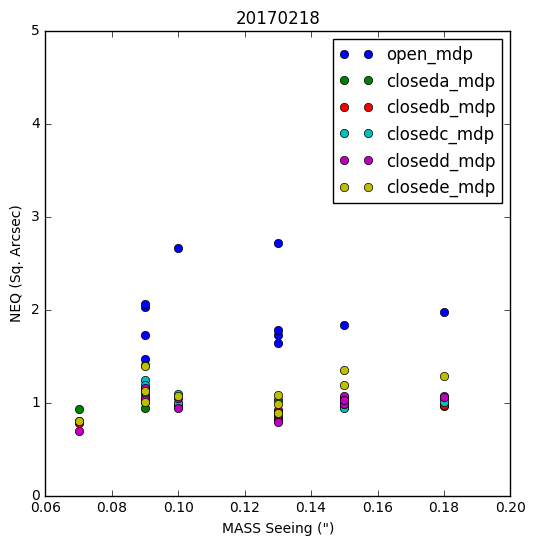

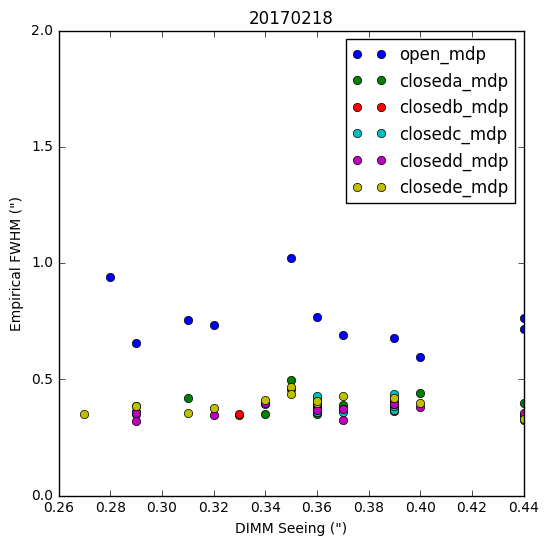

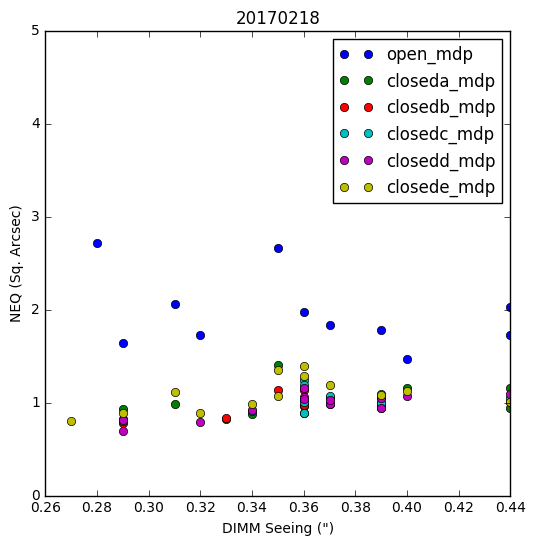

In [14]:
plot_stats.plot_stats_mdp('20170218', ['open_mdp', 'closeda_mdp', 'closedb_mdp', 'closedc_mdp', 'closedd_mdp', 'closede_mdp'], out_suffix='', root_dir='/Users/fatimaabdurrahman/Desktop/')

# More FWHM plots, with Ratios

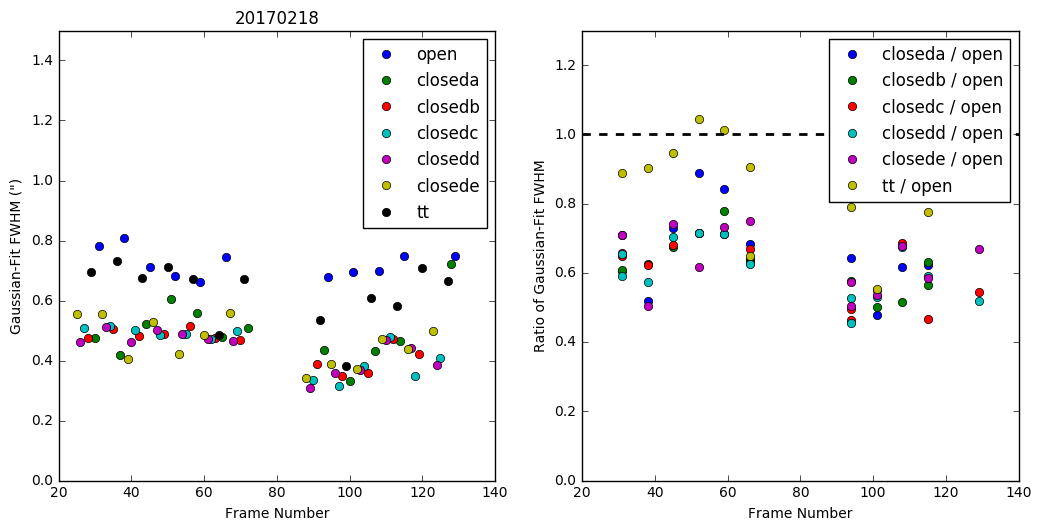

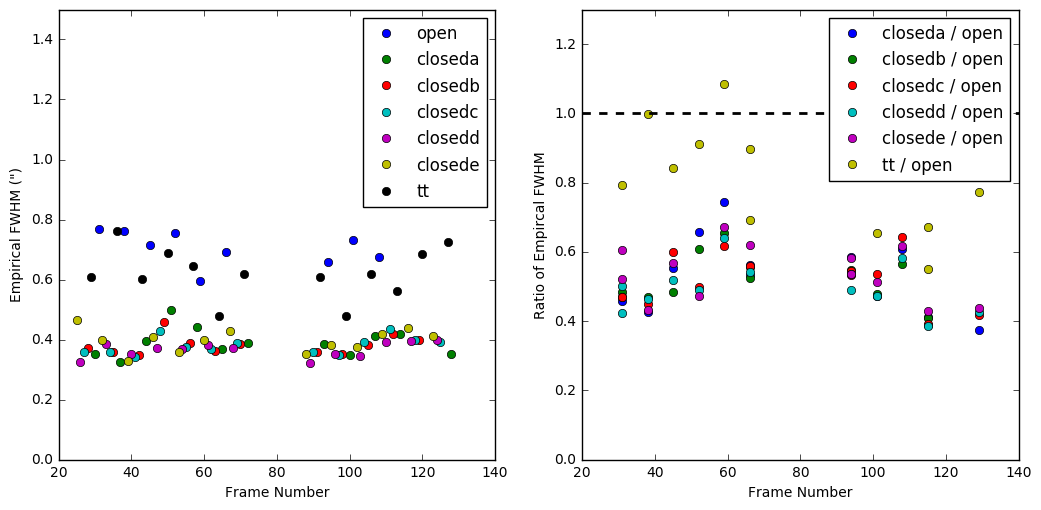

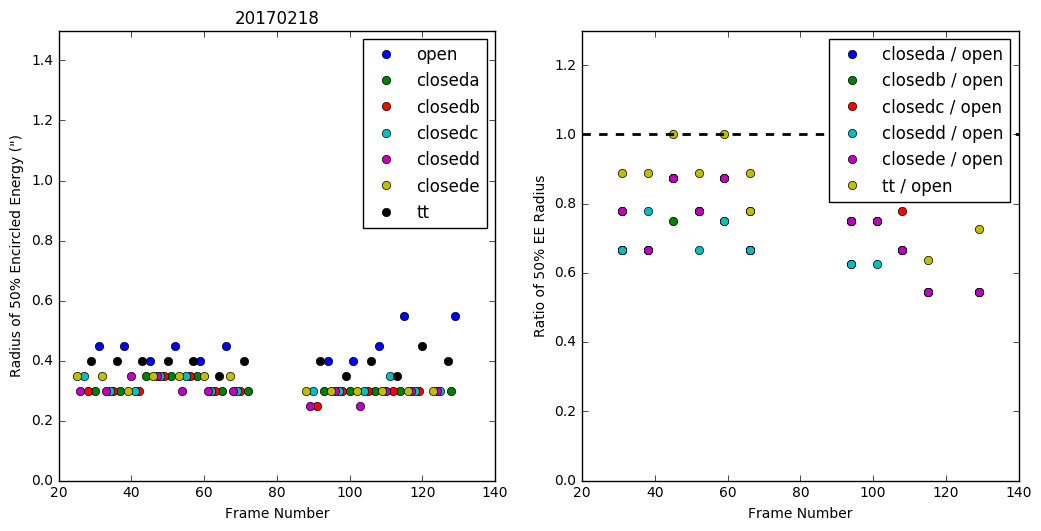

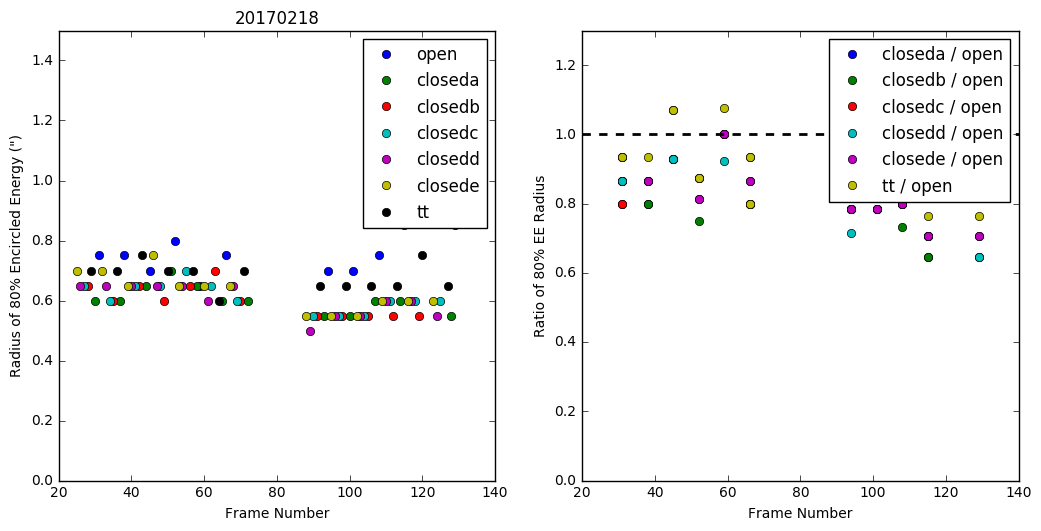

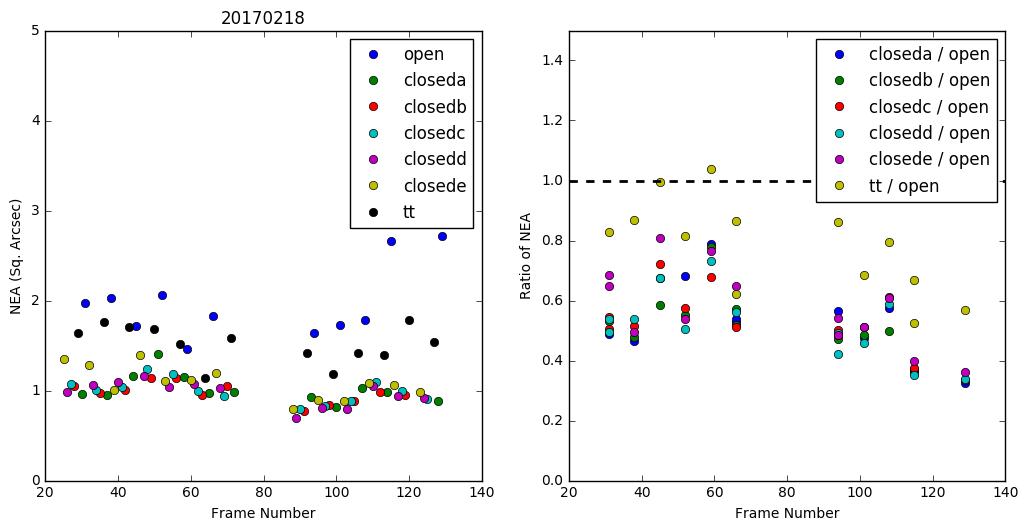

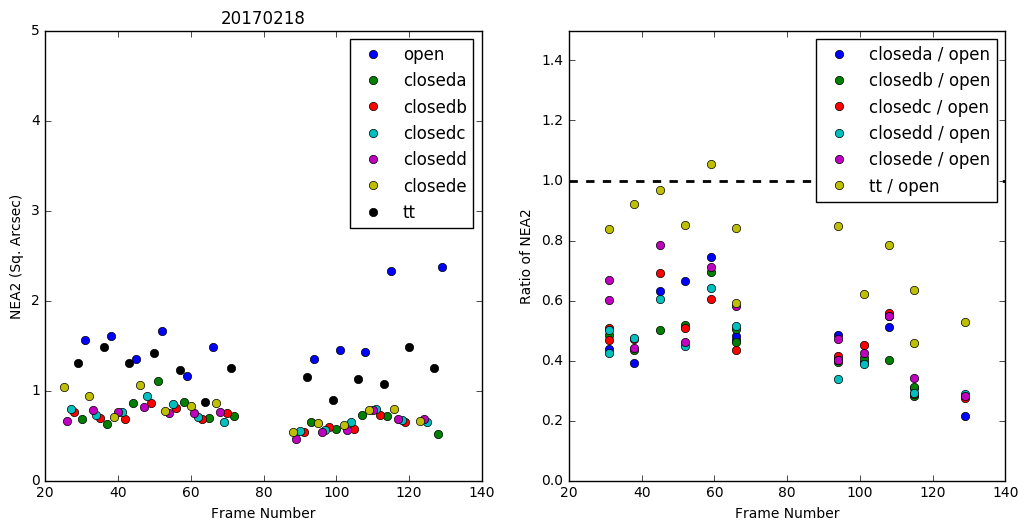

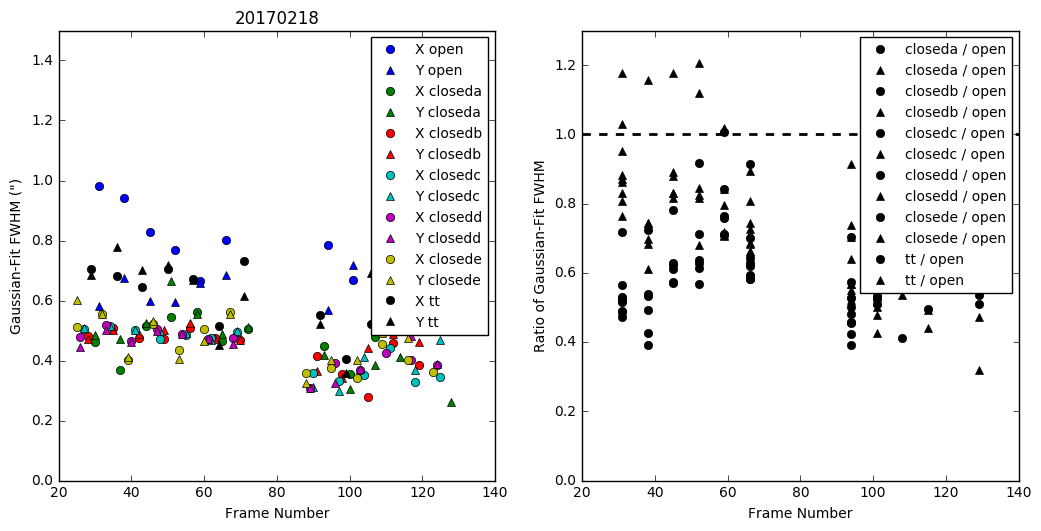

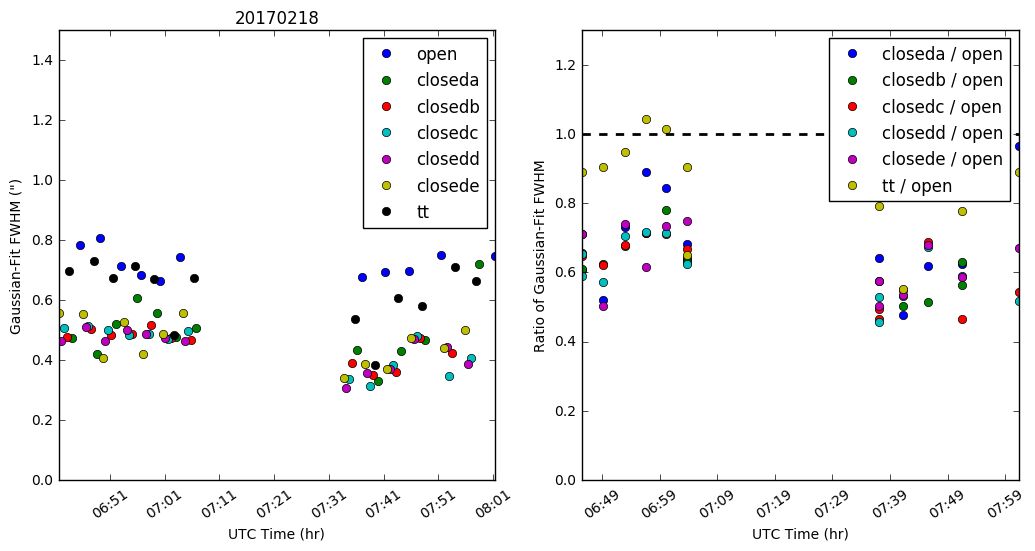

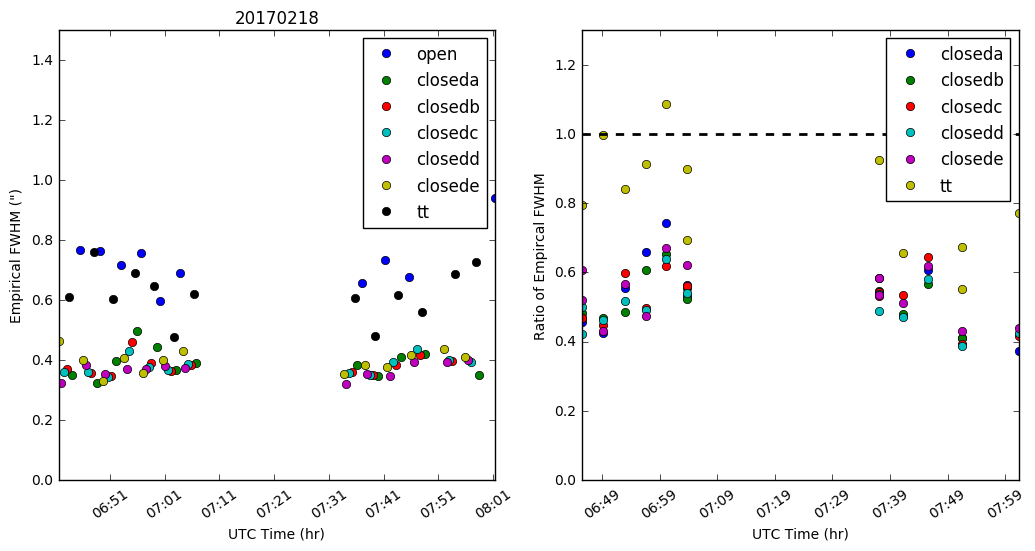

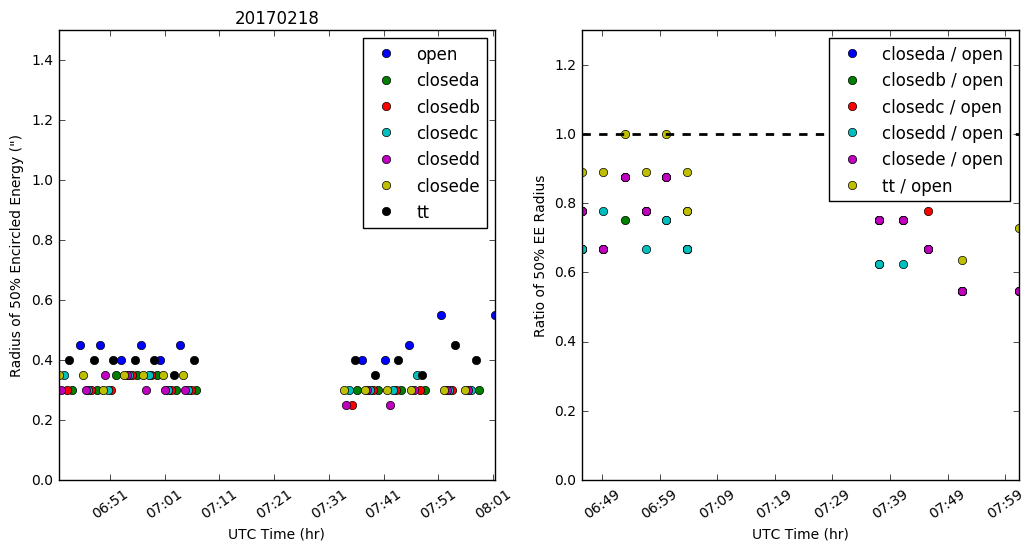

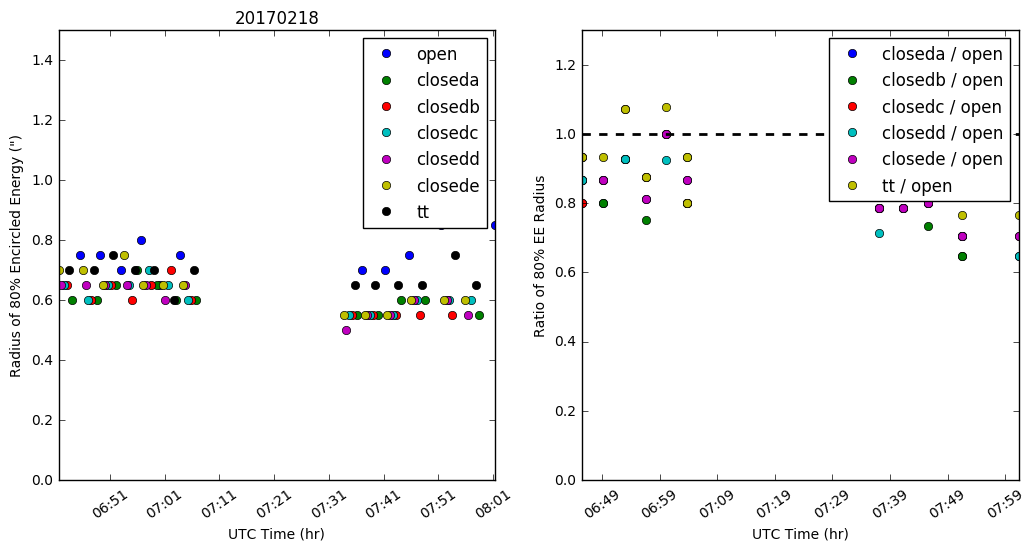

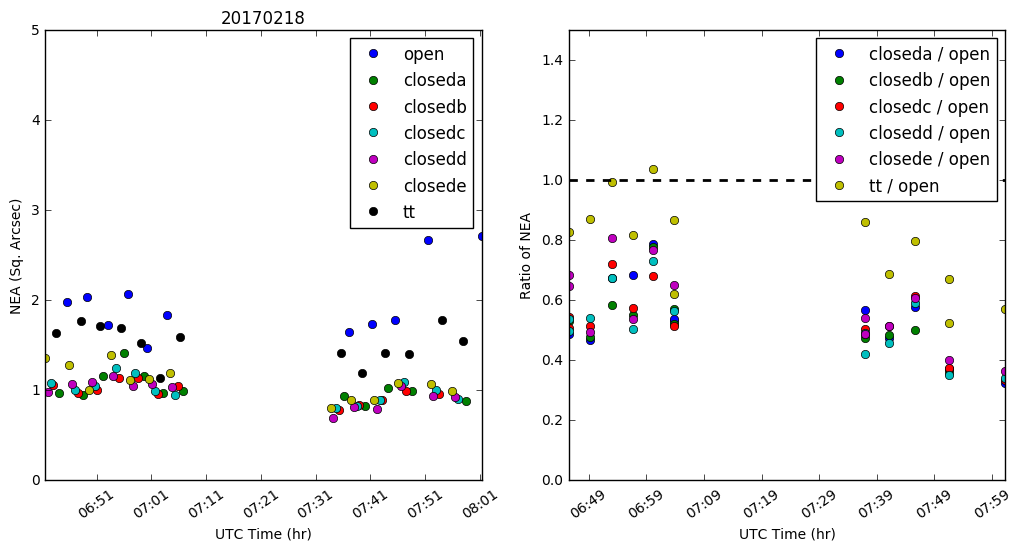

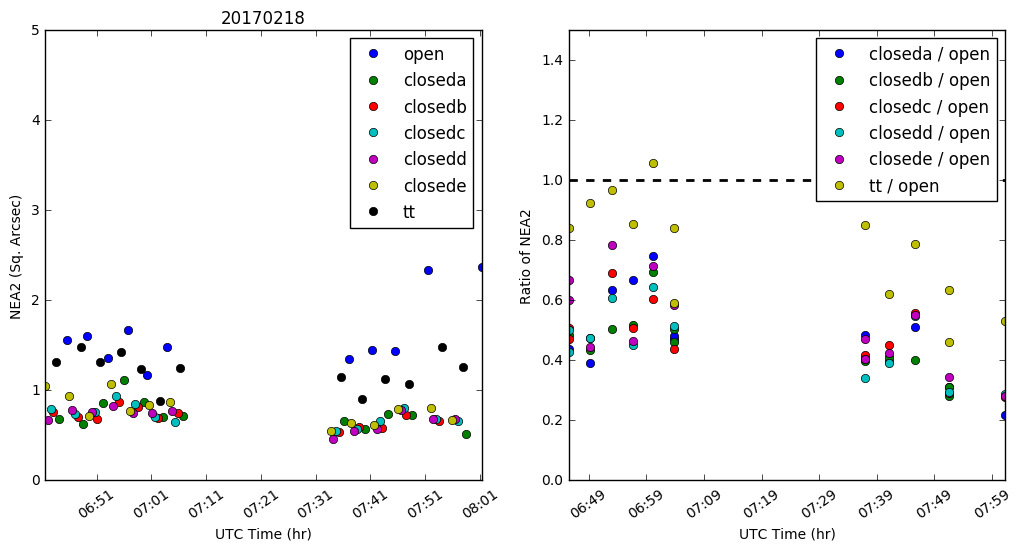

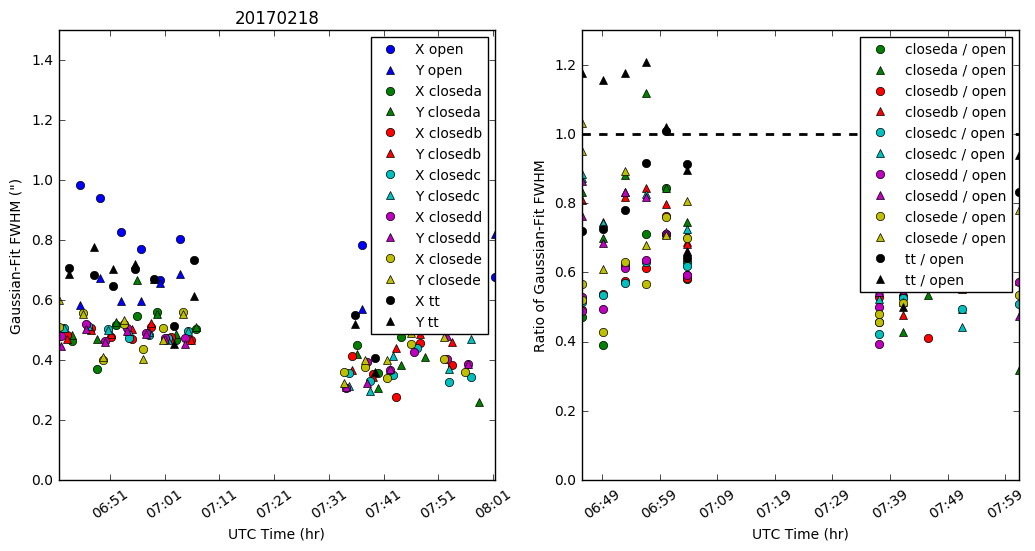

In [15]:
plot_stats.plot_stack_stats('20170218', suffixes, root_dir)
